# Pathway Proteins vs. titer

#### 1) Curate notebook for proteomics Data
- Import libraries
- Import data
- Set Figure_Data folder for import
- Set Figure_Export folder for plots
- Translate gene names into locus names

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import linregress

In [2]:
input_dir = r'Figure_Data'
output_dir = r'Figure_Export'

In [22]:
# Incorporates all DBTL cycles
# filenames = [f'DBTL{i}.csv' for i in range(7)]
filenames = [f'DBTL{5}.csv']
input_paths = [os.path.join(input_dir, filename) for filename in filenames]

# Load CSVs and concatenate multiple files if necessary
dataframes = [pd.read_csv(input_path) for input_path in input_paths]
proteomics_df = pd.concat(dataframes, ignore_index=True)
isoprenol_df = pd.read_csv('Figure_Data/250317_All_Data.csv')

proteomics_df['Line Name'] = proteomics_df['Sample'] + '-' + proteomics_df['Replicate'].astype(str)

In [23]:
isoprenol_df = isoprenol_df[ (isoprenol_df['cycle'] == 5)]

In [24]:
isoprenol_df = isoprenol_df[(isoprenol_df['to_keep_improved'] == True)]

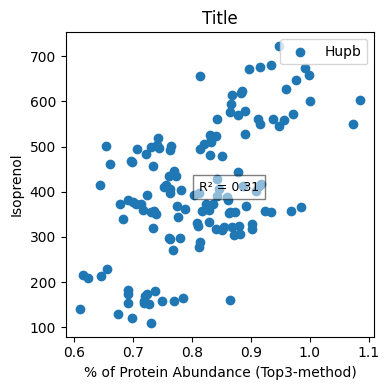

In [29]:
# Select specific proteins
proteins_of_interest = ['Mvk', 'Ef_1364', 'Mvas', 'Mvd1', 'Apha']
proteins_of_interest = ['Hupb']
filtered_proteomics_df = proteomics_df[proteomics_df['Protein'].isin(proteins_of_interest)]

# Merge the two DataFrames on the "Line Name" column
merged_df = pd.merge(filtered_proteomics_df, isoprenol_df, on='Line Name')
merged_df = merged_df[(merged_df['%_of protein_abundance_Top3-method'] != 0) &
                      (merged_df['isoprenol'] != 0) &
                      (merged_df['%_of protein_abundance_Top3-method'] >= 0.001) &
                       (merged_df['isoprenol'] >= 10)]

# Plotting
plt.figure(figsize=(4, 4))
for protein in proteins_of_interest:
    protein_df = merged_df[merged_df['Protein'] == protein]
    if not protein_df.empty:
        plt.scatter(protein_df['%_of protein_abundance_Top3-method'], protein_df['isoprenol'], label=f"{protein}")
        
        # Calculate linear regression and R² value
        slope, intercept, r_value, p_value, std_err = linregress(protein_df['%_of protein_abundance_Top3-method'], protein_df['isoprenol'])
        r_squared = r_value ** 2
        
        # Display R² value on the plot
        plt.text(protein_df['%_of protein_abundance_Top3-method'].mean(), 
                 protein_df['isoprenol'].mean(), 
                 f"R² = {r_squared:.2f}", 
                 fontsize=9, 
                 bbox=dict(facecolor='white', alpha=0.5))
    else:
        print(f"No data found for protein: {protein}")

plt.xlabel('% of Protein Abundance (Top3-method)')
plt.ylabel('Isoprenol')
plt.title('Title')
plt.legend()
plt.tight_layout()
plt.show()